In [1]:
import pyabf
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib import cm
#from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from os import getcwd,listdir
#import csv
import copy
from util import findStable_Bias, cal_points_qty, print_points_qty, plot_wave, plot_colormap, calculate_mean

# Start

##### V2: Include Bias
* 800mV 22214004.abf: 3120 + 4(start) + 3(end) = 3127
* 700mV 22214005.abf: 3120 + 6(start) = 3126
* 200mV 22318006.abf: 3120 + 5(start) = 3125
* 500mV 22304010.abf:
* 200mV 22323007.abf: 3120 + 
* 200mV 22504024.abf: 3120 + 12(start) = 3132
* 600mV 22519010.abf: 3120 + 3(start)= 3123 #Care for time: 36818519 36818524
### V1: Not include Bias

* 800mV 21n05000.abf: 3120 + 4(start) = 3124
* 700mV 21n05001.abf: 3120 + 4(start) + 41(end) = 3165 
* 600mV 21n05002.abf: 3120 + 4(start) = 3124
* 500mV 21n05003.abf: 3120 + 6(start) + 21(end) = 3147
* 400mV 21n05004.abf: Last point have only close, 3120+5(start)+1(end) = 3126
* 300mV 21n05005.abf: 3120 + 4(start) + 39(end) = 3163
* 600mV 21930014.abf: 3120 + 5(start)  = 3125
* 800mV 21d04000.abf: 3120 + 6(start) + 30(end) =3156

In [3]:
abf_file = "24903000.abf"
abf = pyabf.ABF("abf\\"+abf_file)
abf_name = abf_file[:-4]

In [17]:
bins = 50
# start_ignore and end_ignore: extra points before reshape into rows
# start_extra and end_extra: extra points of each rows
start_ignore = 2 #Don't include the single point
end_ignore = 12  #Don't include the single point
start_extra = 5
end_extra = 0
volt = 200
title_prefix = abf_name
fig_save_path =getcwd()+"\\result\\"
Row = 100
Col = 100
start_single = True
end_single = False
emf_bias = -300
current_bias = 0

In [18]:
ignore = (start_ignore,end_ignore)
extra = (start_extra,end_extra)
dim = (Row-1, Col)
single = (start_single,end_single)

In [19]:
close,far,close_index,end_index = findStable_Bias(abf,volt,single=single)

Close point found: 11009
Far point found: 11009


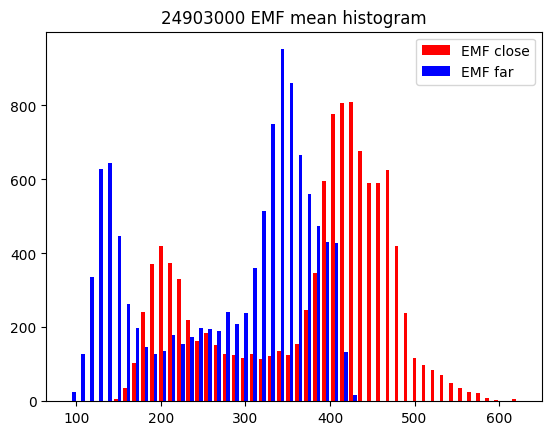

In [20]:
plt.figure()
plt.hist((close,far),bins=bins,label = ('EMF close','EMF far'),color = ('red','blue'))
plt.legend()
plt.title("%s EMF mean histogram"%(title_prefix))
plt.savefig(fig_save_path+"%s EMF mean histogram"%(title_prefix))
plt.show()

In [23]:
mat = cal_points_qty(abf,end_index)

In [ ]:
# For special case: mat's col = 50 but Col = 100


In [22]:
target = close/far
target = calculate_mean(target, copy.deepcopy(mat), ignore, extra, dim)
mean = np.mean(target)
std = np.std(target)
print(f"%lf ± %lf" %(mean,std))

figsize = (int(target.shape[0]/8), int(target.shape[1]/8))
title = title_prefix + " EMF close÷far"
plot_colormap(target,title = title,path = fig_save_path+title, figsize = figsize)

ValueError: cannot reshape array of size 4950 into shape (99,100)

In [ ]:
target = close-far
target = calculate_mean(target, copy.deepcopy(mat), ignore, extra, dim)
mean = np.mean(target)
std = np.std(target)
print(f"%lf ± %lf" %(mean,std))

figsize = (int(target.shape[0]/8), int(target.shape[1]/8))
title = title_prefix + " EMF close-far"
plot_colormap(target,title = title_prefix + " EMF close-far" ,path = fig_save_path+title, figsize = figsize)

In [13]:
# Calculate on Current
I_close,I_far,_,_ = findStable_Bias(abf,volt,single=single,channel = 0)

Close point found: 11009
Far point found: 11009


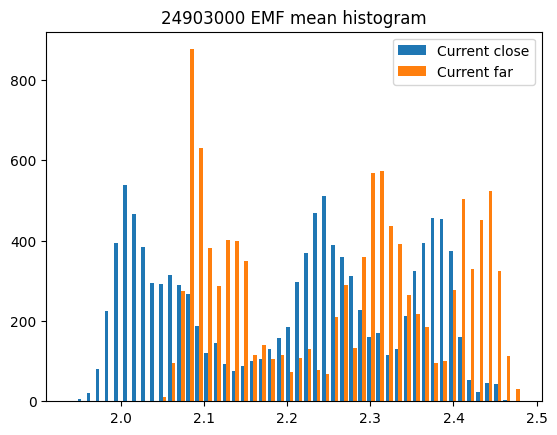

In [14]:
plt.figure()
plt.hist((I_close,I_far),bins=bins,label = ('Current close','Current far'))
plt.legend()
plt.title("%s EMF mean histogram"%(title_prefix))
plt.savefig(fig_save_path+"%s EMF mean histogram"%(title_prefix))
plt.show()

0.971966 ± 0.007203


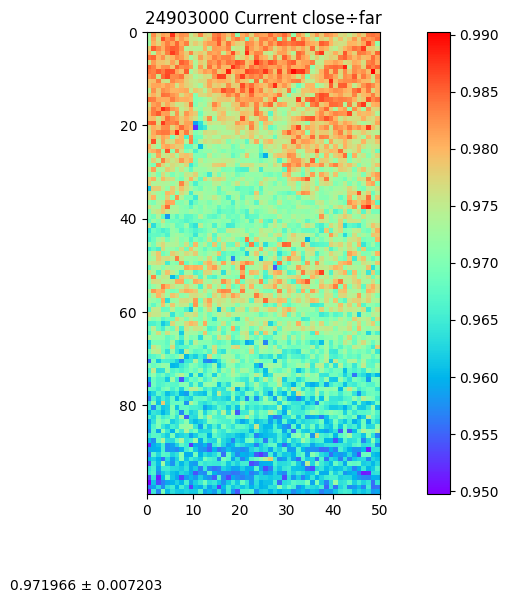

In [15]:
target = I_close/I_far
target = calculate_mean(target, copy.deepcopy(mat), ignore, extra, dim)
mean = np.mean(target)
std = np.std(target)
print(f"%lf ± %lf" %(mean,std))

figsize = (int(target.shape[0]/8), int(target.shape[1]/8))
title = title_prefix + " Current close-far"
plot_colormap(target,title = title_prefix + " Current close÷far" ,path = fig_save_path+title, figsize = figsize)

-0.062369 ± 0.013608


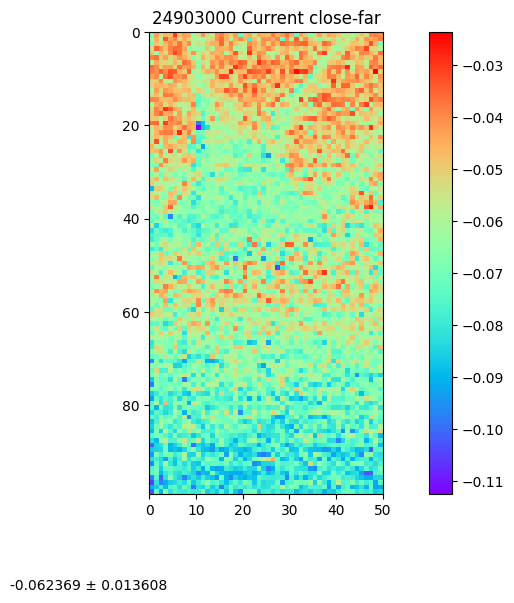

In [16]:
target = I_close-I_far
target = calculate_mean(target, copy.deepcopy(mat), ignore, extra, dim)
mean = np.mean(target)
std = np.std(target)
print(f"%lf ± %lf" %(mean,std))

figsize = (int(target.shape[0]/8), int(target.shape[1]/8))
title = title_prefix + " Current close-far"
plot_colormap(target,title = title_prefix + " Current close-far" ,path = fig_save_path+title, figsize = figsize)

In [108]:
with open("result\\"+abfFile+'_current_div-pqty='+str(pqty)+'.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the data
    for row in Current_normalized_data:
        writer.writerow(row)

In [109]:
with open("result\\"+abfFile+'_current_subs-pqty='+str(pqty)+'.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the data
    for row in Current_normalized_data_subs:
        writer.writerow(row)

In [110]:
with open("result\\"+abfFile+'_EMF_div-pqty='+str(pqty)+'.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the data
    for row in EMF_normalized_data:
        writer.writerow(row)

In [111]:
with open("result\\"+abfFile+'_EMF_subs-pqty='+str(pqty)+'.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the data
    for row in EMF_normalized_data_subs:
        writer.writerow(row)

In [112]:
with open("result\\"+abfFile+'_EMF-pqty='+str(pqty)+'.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the data
    for w,x,y,z in zip(aut_close,aut_far,quartz_close,quartz_far):
        writer.writerow([w,x,y,z])

In [113]:
with open("result\\"+abfFile+'-pqty='+str(pqty)+'_current.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the data
    for w,x,y,z in zip(I_aut_close,I_aut_far,I_quartz_close,I_quartz_far):
        writer.writerow([w,x,y,z])

In [129]:
with open("result\\"+abfFile+'_EMF_close-pqty='+str(pqty)+'.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the data
    w_close = np.hstack((np.reshape(aut_close,(Row-1,int(Col/2))),np.reshape(quartz_close,(Row-1,int(Col/2)))))
    for x in w_close:
        writer.writerow(x)

In [130]:
with open("result\\"+abfFile+'_EMF_far-pqty='+str(pqty)+'.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the data
    w_far = np.hstack((np.reshape(aut_far,(Row-1,int(Col/2))),np.reshape(quartz_far,(Row-1,int(Col/2)))))
    for x in w_far:
        writer.writerow(x)

# Test

## Test 01 -- With start time and end time

Close point found: 2
Far point found: 1


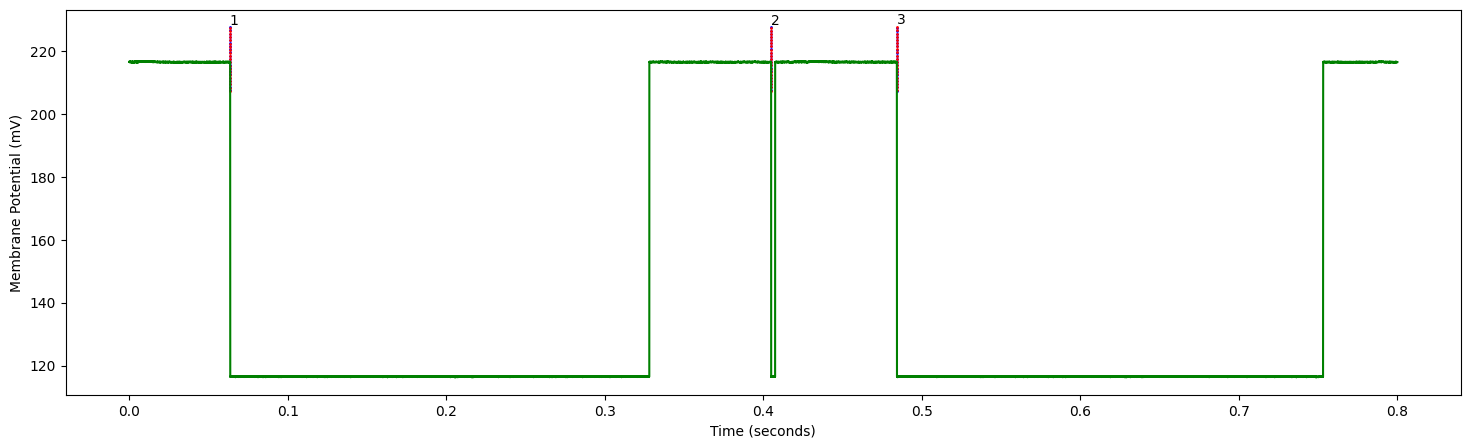

[216.543  216.543  216.4819 ... 216.4819 216.4819 216.4819]


In [8]:
timeStart = 0
timeEnd = 20000
plot_wave(abf,volt,timeStart = timeStart, timeEnd = timeEnd,channel=4)
print(abf.sweepY[timeStart:timeEnd])

Close point found: 1
Far point found: 0


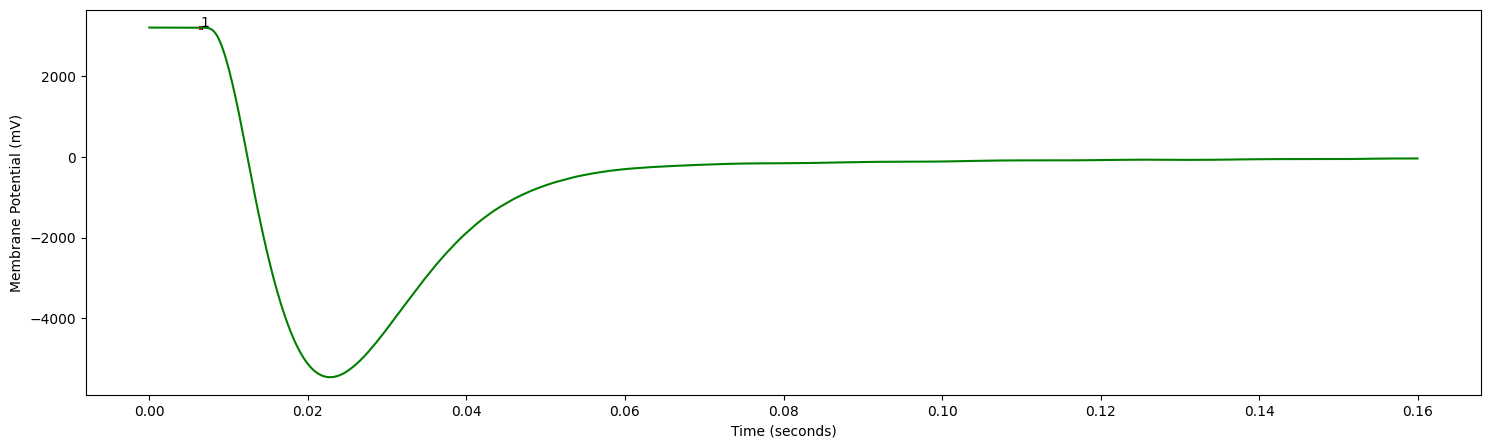

Close point found: 1
Far point found: 0


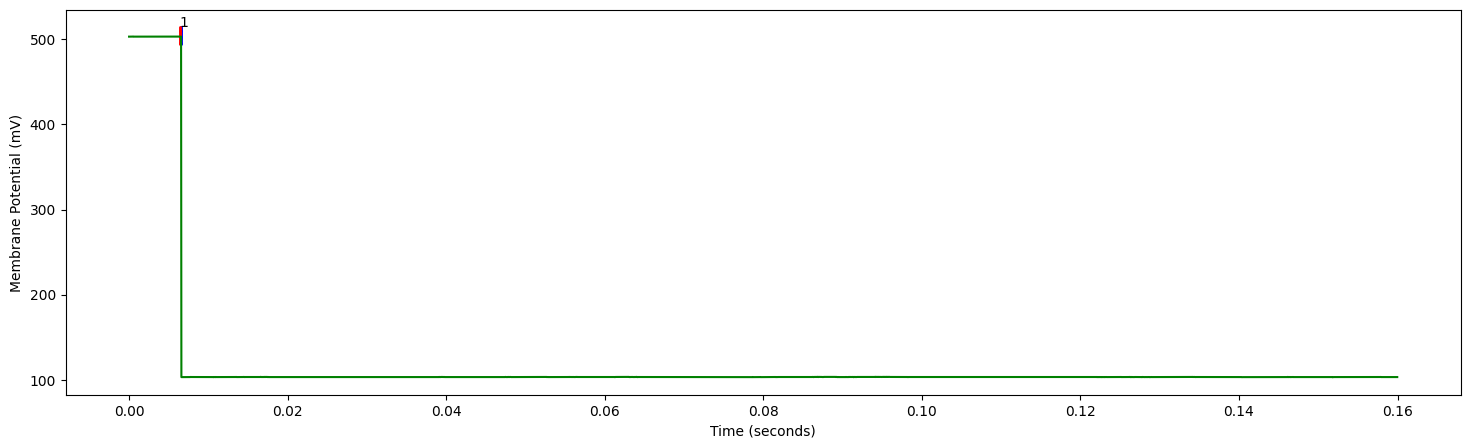

(1, 0)

In [15]:
#Test
abfFile = "23428006.abf"
volt = 500
abf = pyabf.ABF("..\\data\\0727\\23428006\\"+abfFile)
plot_v2(abf,volt,timeStart = 0,timeEnd = 4000,channel=2)
plot_v2(abf,volt,timeStart = 0 ,timeEnd = 4000,channel=4)

## Test 02_v2 -- Check all graph

Time: 0 ~ 200050
Close point found: 10
Far point found: 9


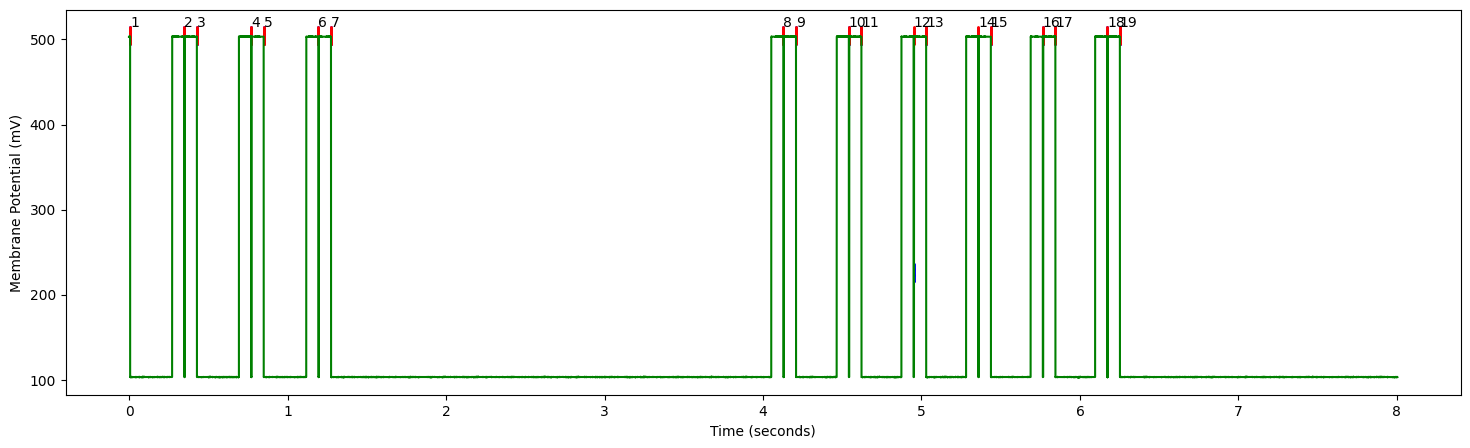

Time: 200000 ~ 400050
Close point found: 11
Far point found: 11


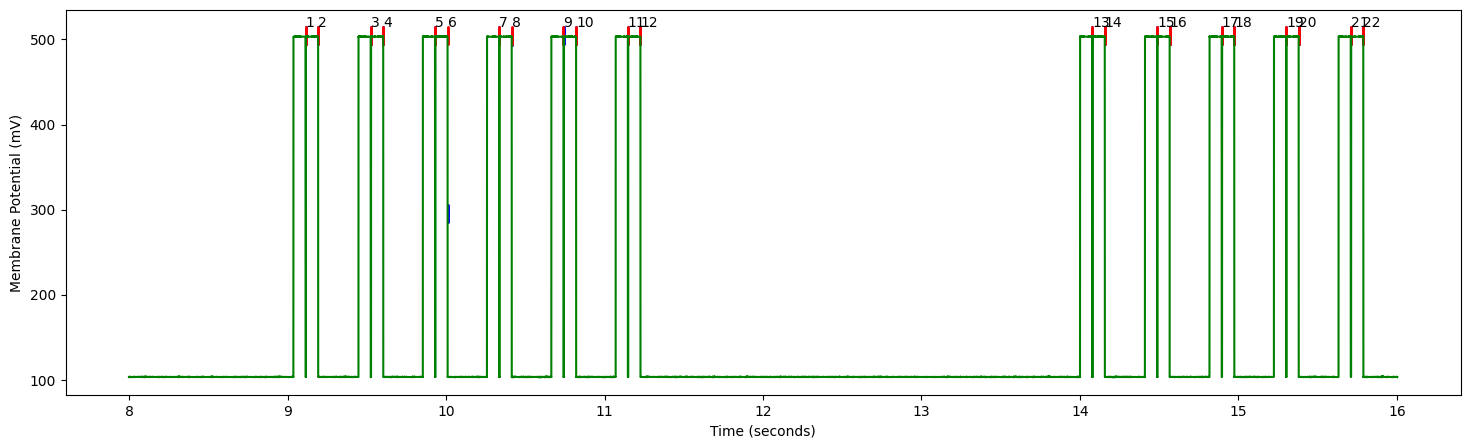

Time: 400000 ~ 600050
Close point found: 7
Far point found: 7


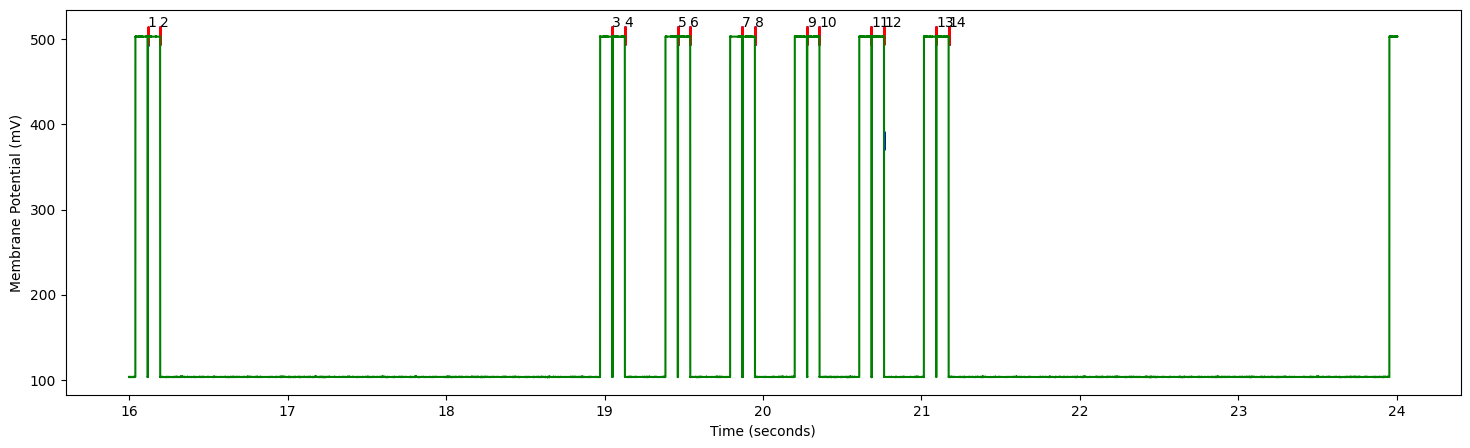

Time: 600000 ~ 800050


KeyboardInterrupt: 

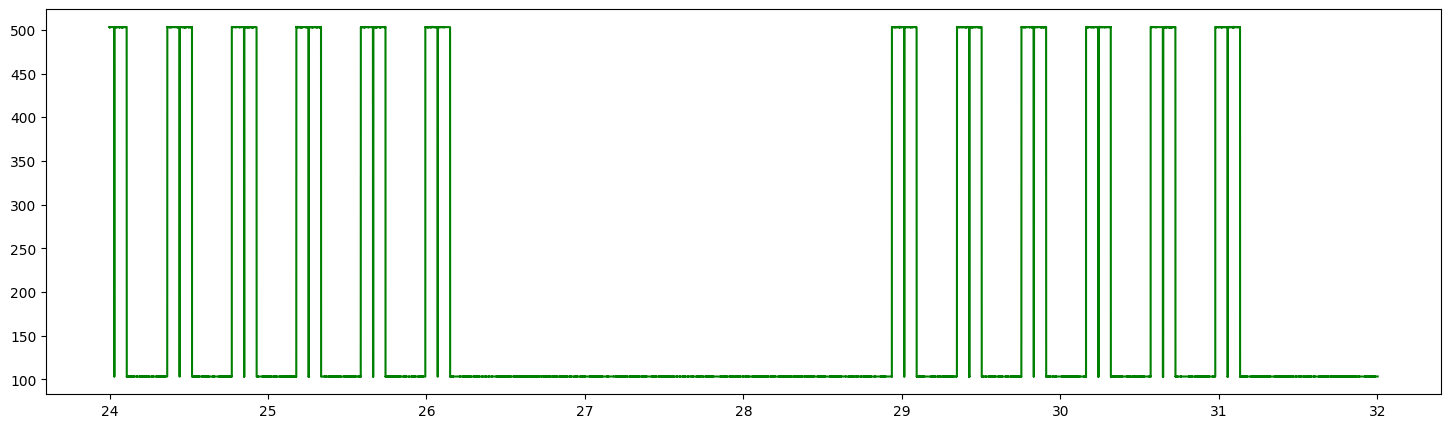

In [19]:
interval = 200000
for i in range(0,len(abf.sweepY),interval):
    print("Time: %d ~ %d"%(i,i+interval+50))
    timeStart = i
    timeEnd = i+interval+50
    close_qty,far_qty = plot_v2(abf,volt,timeStart = timeStart, timeEnd = timeEnd,channel = 4)
    

## Test 03_v3--Check Total Points Collected in each (x,y)

In [7]:
mat = print_points_qty(abf,end_index)

  0. 14 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 Row Dimension:50 ; Row Total: 602
  1. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:50 ; Row Total: 105
  2. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:50 ; Row Total: 105
  3. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:50 ; Row Total: 105
  4. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  Row Dimension:50 ; Row Total: 105
  5. 7  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 